In [8]:
%matplotlib inline
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms
import torch.nn as nn
import models.cnn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
  datasets.MNIST('data', train=True, download=True,
                 transform=transforms.ToTensor()),
  batch_size=batch_size, shuffle=True)

input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001
hp = {'input_size':input_size,
      'num_classes':num_classes,
      'num_epochs':num_epochs,
      'batch_size':batch_size ,
      'learning_rate':learning_rate,
      'hidden_n':1000}

cnn = models.cnn.ConvNet(hp) # models/cnn.py could be edited to change the network
cnn.train(train_loader)

Processing...
Done!
Epoch [1/5], Step [100/469], Loss: 0.1156
Epoch [1/5], Step [200/469], Loss: 0.0567
Epoch [1/5], Step [300/469], Loss: 0.0358
Epoch [1/5], Step [400/469], Loss: 0.0329
Epoch [2/5], Step [100/469], Loss: 0.0277
Epoch [2/5], Step [200/469], Loss: 0.0211
Epoch [2/5], Step [300/469], Loss: 0.0160
Epoch [2/5], Step [400/469], Loss: 0.0181
Epoch [3/5], Step [100/469], Loss: 0.0275
Epoch [3/5], Step [200/469], Loss: 0.0145
Epoch [3/5], Step [300/469], Loss: 0.0160
Epoch [3/5], Step [400/469], Loss: 0.0140
Epoch [4/5], Step [100/469], Loss: 0.0095
Epoch [4/5], Step [200/469], Loss: 0.0100
Epoch [4/5], Step [300/469], Loss: 0.0140
Epoch [4/5], Step [400/469], Loss: 0.0084
Epoch [5/5], Step [100/469], Loss: 0.0089
Epoch [5/5], Step [200/469], Loss: 0.0094
Epoch [5/5], Step [300/469], Loss: 0.0107
Epoch [5/5], Step [400/469], Loss: 0.0044


In [9]:
mnist_dataset = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

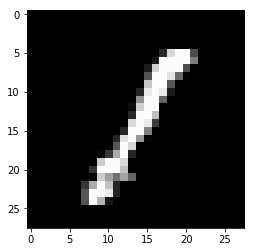

In [46]:
e,l = mnist_dataset[553]
t = e.view(28,28).numpy()
x = torch.tensor(e, requires_grad=True)
imgplot = plt.imshow(t, cmap='gray')


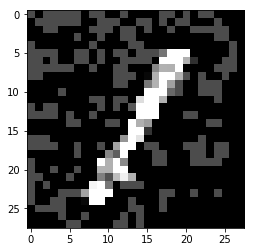

In [47]:
ep = 0.3
softmax = nn.Softmax(dim = 1)
y = cnn(x.view(-1, 1, 28, 28))# type(p)
ll = torch.zeros(10)
ll[l] = 1
loss = ((y - ll).norm()**2)
loss.backward()
eta = ep*x.grad.data.sign()
x_ = torch.clamp(x+eta, 0, 1).detach()
img = x_.view(28, 28).numpy()
imgplot = plt.imshow(img, cmap='gray')
z = cnn(x_.view(-1, 1, 28, 28))

In [51]:
correct = softmax(y.detach())
adversary = softmax(z.detach())
correct.max(1)[1].item(),correct.max(1)[0].item(),adversary.max(1)[1].item(),adversary.max(1)[0].item()

(1, 0.4032798111438751, 1, 0.21372951567173004)

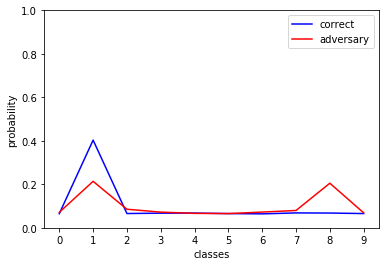

In [49]:
plt.xticks(range(0,10))
plt.ylim(0,1)
line = plt.plot(correct.view(10,-1).numpy(), 'b-', label='correct')
plt.xlabel("classes")
plt.ylabel("probability")
line = plt.plot(adversary.view(10,-1).numpy(), 'r-', label='adversary')
plt.legend()
plt.savefig('fig1.png')
plt.show()

In [62]:
#get good adversaries
mnist_dataset = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
for i in range(0,9999):
    e,l = mnist_dataset[i]
    t = e.view(28,28).numpy()
    x = torch.tensor(e, requires_grad=True)
#     imgplot = plt.imshow(t, cmap='gray')
    ep = 0.3
    softmax = nn.Softmax(dim = 1)
    y = cnn(x.view(-1, 1, 28, 28))# type(p)
    ll = torch.zeros(10)
    ll[l] = 1
    loss = ((y - ll).norm()**2)
    loss.backward()
    eta = ep*x.grad.data.sign()
    x_ = torch.clamp(x+eta, 0, 1).detach()
#     img = x_.view(28, 28).numpy()
#     imgplot = plt.imshow(img, cmap='gray')
    z = cnn(x_.view(-1, 1, 28, 28))
    guess = softmax(y.detach())
    adversary = softmax(z.detach())
    if (guess.max(1)[1].item()==l) and (guess.max(1)[1].item() != adversary.max(1)[1].item()):
        print('adversary attack at: {}'.format(i),
              guess.max(1)[1].item(),    guess.max(1)[0].item(),
              adversary.max(1)[1].item(),adversary.max(1)[0].item())

adversary attack at: 2 1 0.4215395152568817 8 0.22432054579257965
adversary attack at: 39 1 0.4206346869468689 8 0.3194355368614197
adversary attack at: 43 2 0.4235993027687073 4 0.27436500787734985
adversary attack at: 62 9 0.2155838906764984 5 0.16673798859119415
adversary attack at: 95 4 0.4009438753128052 8 0.4177534878253937
adversary attack at: 115 4 0.2318538874387741 9 0.3982435166835785
adversary attack at: 151 9 0.3024309277534485 8 0.5365491509437561
adversary attack at: 175 7 0.3267313838005066 8 0.28823238611221313
adversary attack at: 193 9 0.36796167492866516 8 0.377244770526886
adversary attack at: 202 1 0.43869173526763916 8 0.2176363617181778
adversary attack at: 321 2 0.22738629579544067 7 0.3686120808124542
adversary attack at: 340 5 0.27737799286842346 3 0.5031131505966187
adversary attack at: 348 1 0.43701061606407166 8 0.3903006315231323
adversary attack at: 354 1 0.432670921087265 8 0.2717839777469635
adversary attack at: 388 1 0.42993125319480896 8 0.2602129876

adversary attack at: 2293 9 0.14442521333694458 6 0.29183682799339294
adversary attack at: 2308 3 0.2645089328289032 5 0.35954540967941284
adversary attack at: 2339 5 0.4816921651363373 8 0.33460545539855957
adversary attack at: 2387 9 0.20045316219329834 1 0.27068859338760376
adversary attack at: 2418 1 0.42998892068862915 8 0.29082170128822327
adversary attack at: 2422 6 0.2566981315612793 8 0.30163338780403137
adversary attack at: 2510 1 0.4634535014629364 8 0.3501879572868347
adversary attack at: 2524 1 0.4274499714374542 8 0.21172629296779633
adversary attack at: 2573 5 0.24748755991458893 8 0.5055846571922302
adversary attack at: 2582 9 0.22825266420841217 7 0.3514212667942047
adversary attack at: 2599 1 0.43310612440109253 8 0.2597304880619049
adversary attack at: 2610 2 0.3821355104446411 8 0.44203653931617737
adversary attack at: 2631 0 0.33950817584991455 6 0.3773196339607239
adversary attack at: 2659 4 0.32800984382629395 8 0.46090278029441833
adversary attack at: 2668 5 0.3

adversary attack at: 4808 3 0.18851037323474884 5 0.4282602369785309
adversary attack at: 4814 6 0.16805024445056915 0 0.45875850319862366
adversary attack at: 4842 4 0.42906105518341064 9 0.26586002111434937
adversary attack at: 4860 4 0.3217805027961731 9 0.31210410594940186
adversary attack at: 4874 9 0.15446563065052032 6 0.20823265612125397
adversary attack at: 4917 1 0.4382219612598419 8 0.22275897860527039
adversary attack at: 4943 2 0.24712035059928894 8 0.4614487886428833
adversary attack at: 4951 1 0.4194791913032532 8 0.2332598865032196
adversary attack at: 4956 8 0.24592110514640808 4 0.31249725818634033
adversary attack at: 4966 7 0.20948408544063568 8 0.5259605646133423
adversary attack at: 5025 1 0.43574583530426025 8 0.30465638637542725
adversary attack at: 5044 1 0.41704702377319336 8 0.23260550200939178
adversary attack at: 5067 3 0.3199075758457184 2 0.2655012309551239
adversary attack at: 5091 1 0.3885611295700073 8 0.3583905100822449
adversary attack at: 5092 1 0.4

adversary attack at: 7468 1 0.4273544251918793 8 0.3005077838897705
adversary attack at: 7480 1 0.39219313859939575 8 0.21781055629253387
adversary attack at: 7527 1 0.3971104025840759 8 0.2476390302181244
adversary attack at: 7556 1 0.3837510347366333 8 0.2460741400718689
adversary attack at: 7561 1 0.42872560024261475 8 0.23563788831233978
adversary attack at: 7563 1 0.42855557799339294 8 0.39756330847740173
adversary attack at: 7732 5 0.34806346893310547 8 0.4618509113788605
adversary attack at: 7736 9 0.379435658454895 8 0.2808949947357178
adversary attack at: 7784 1 0.42020559310913086 8 0.2678174078464508
adversary attack at: 7790 1 0.42587441205978394 8 0.30297669768333435
adversary attack at: 7802 1 0.44073566794395447 8 0.23363175988197327
adversary attack at: 7806 1 0.4250241816043854 8 0.31448662281036377
adversary attack at: 7811 1 0.41391703486442566 8 0.26011380553245544
adversary attack at: 7812 1 0.3546794056892395 8 0.2058277726173401
adversary attack at: 7822 1 0.3324

adversary attack at: 9946 1 0.4201867878437042 8 0.24111530184745789
adversary attack at: 9955 1 0.43094396591186523 8 0.24188044667243958
adversary attack at: 9993 0 0.35835129022598267 8 0.2876147925853729
